In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score, classification_report
import pickle
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load the dataset from CSV
data = pd.read_csv('data/features_full_v7.csv')

# Drop the 'file' column (not useful for training)
data = data.drop(columns=['file'])

# Separate features (X) and labels (y)
X = data.drop(columns=['label'])
y = data['label']

# Encode the labels (e.g., happy, sad, etc.)
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Feature scaling (normalize features)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [3]:
label_encoder.classes_

array(['fearful', 'pumpup', 'relaxing ', 'sad'], dtype=object)

In [4]:
# Define a dictionary of models to train
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "SVM": SVC(kernel='rbf', C=1, random_state=42),
    "Neural Network": MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5),
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42)
}

# Dictionary to store accuracies
model_accuracies = {}

# Iterate through the models
for model_name, model in models.items():
    print(f"Training {model_name}...")
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions and evaluate the model
    y_pred = model.predict(X_test)
    
    # Evaluate performance
    accuracy = accuracy_score(y_test, y_pred)
    model_accuracies[model_name] = accuracy
    print(f"{model_name} Accuracy: {accuracy:.4f}")
    
    # Print detailed classification report
    print(f"Classification Report for {model_name}:\n{classification_report(y_test, y_pred)}\n")

# Convert the accuracies into a pandas DataFrame
results_df = pd.DataFrame(list(model_accuracies.items()), columns=["Model", "Accuracy"])

Training Random Forest...
Random Forest Accuracy: 0.5789
Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.33      0.50      0.40         8
           1       0.80      0.50      0.62         8
           2       0.73      0.67      0.70        12
           3       0.60      0.60      0.60        10

    accuracy                           0.58        38
   macro avg       0.62      0.57      0.58        38
weighted avg       0.63      0.58      0.59        38


Training SVM...
SVM Accuracy: 0.5789
Classification Report for SVM:
              precision    recall  f1-score   support

           0       0.30      0.38      0.33         8
           1       0.83      0.62      0.71         8
           2       0.89      0.67      0.76        12
           3       0.46      0.60      0.52        10

    accuracy                           0.58        38
   macro avg       0.62      0.57      0.58        38
weighted avg      

In [5]:
# Train cnn model

# Reshape X to be 3D (samples, time_steps, features) for CNN input
X_train_cnn = np.expand_dims(X_train, axis=2)  # Shape: (n_samples, n_features, 1)
X_test_cnn = np.expand_dims(X_test, axis=2)    # Shape: (n_samples, n_features, 1)

# Define the CNN model architecture without pooling layers
model = Sequential([
    Input(shape=(X_train_cnn.shape[1], X_train_cnn.shape[2])),  # Define the input shape
    Conv1D(64, 3, activation='relu'),
    Dropout(0.5),

    Conv1D(128, 3, activation='relu'),
    Dropout(0.5),

    Flatten(),  # Flatten the output to connect it to the dense layers
    
    Dense(128, activation='relu'),
    Dropout(0.5),

    Dense(len(label_encoder.classes_), activation='softmax')  # Output layer for multi-class classification
])

In [6]:
# Compile the model
model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [7]:
# Train the model without class weights
model.fit(X_train_cnn, y_train, epochs=20, batch_size=32, validation_data=(X_test_cnn, y_test))

Epoch 1/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.2505 - loss: 1.4017 - val_accuracy: 0.4737 - val_loss: 1.3320
Epoch 2/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3489 - loss: 1.3118 - val_accuracy: 0.5000 - val_loss: 1.2660
Epoch 3/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.4433 - loss: 1.2290 - val_accuracy: 0.4737 - val_loss: 1.1988
Epoch 4/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4791 - loss: 1.2226 - val_accuracy: 0.5000 - val_loss: 1.1461
Epoch 5/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4865 - loss: 1.1391 - val_accuracy: 0.5000 - val_loss: 1.0953
Epoch 6/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5164 - loss: 1.0701 - val_accuracy: 0.5000 - val_loss: 1.0539
Epoch 7/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5365 - loss: 0.9893 - val_accuracy: 0.5263 - val_loss: 1.0177
Epoch 8/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5369 - loss: 1.0030 - val_accuracy: 0.5526 - val_loss: 0.9965
Epoch 

In [8]:
# Evaluate the model
y_pred = np.argmax(model.predict(X_test_cnn), axis=1)
accuracy = accuracy_score(y_test, y_pred)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


In [9]:
# Print the results
print(f"CNN Accuracy: {accuracy}")
print("Classification Report for CNN:")
print(classification_report(y_test, y_pred))

# Add CNN accuracy to the dictionary
model_accuracies["CNN"] = accuracy

CNN Accuracy: 0.5526315789473685
Classification Report for CNN:
              precision    recall  f1-score   support

           0       0.33      0.12      0.18         8
           1       0.60      0.75      0.67         8
           2       0.69      0.75      0.72        12
           3       0.42      0.50      0.45        10

    accuracy                           0.55        38
   macro avg       0.51      0.53      0.51        38
weighted avg       0.52      0.55      0.53        38



In [10]:
# Display the results as a table
# Convert the accuracies into a pandas DataFrame
results_df = pd.DataFrame(list(model_accuracies.items()), columns=["Model", "Accuracy"])
print("\nModel Comparison Table:")
print(results_df)


Model Comparison Table:
                 Model  Accuracy
0        Random Forest  0.578947
1                  SVM  0.578947
2       Neural Network  0.500000
3  K-Nearest Neighbors  0.552632
4  Logistic Regression  0.578947
5                  CNN  0.552632


In [12]:
# SVM had the best results, so we will use that
# Accuracy (0.578947) is the same as Random Forest and Logistic Regression, but SVM has a slightly better weighted average f1-score than the others.
model = SVC(kernel='rbf', C=1, random_state=42)
model.fit(X_train, y_train)

# Make predictions and evaluate the model
y_pred = model.predict(X_test)

# Evaluate performance
model_name = "SVM"
accuracy = accuracy_score(y_test, y_pred)
model_accuracies[model_name] = accuracy
print(f"{model_name} Accuracy: {accuracy:.4f}")

# Print detailed classification report
print(f"Classification Report for {model_name}:\n{classification_report(y_test, y_pred)}\n")

SVM Accuracy: 0.5789
Classification Report for SVM:
              precision    recall  f1-score   support

           0       0.30      0.38      0.33         8
           1       0.83      0.62      0.71         8
           2       0.89      0.67      0.76        12
           3       0.46      0.60      0.52        10

    accuracy                           0.58        38
   macro avg       0.62      0.57      0.58        38
weighted avg       0.64      0.58      0.60        38




In [13]:
# Save the model to a file
with open('SVM_model.pkl', 'wb') as f:
    pickle.dump(model, f)

In [14]:
# Save the Scaler
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

In [15]:
# Save the label encoder
with open('label_encoder.pkl', 'wb') as f:
    pickle.dump(label_encoder, f)

In [16]:
with open("SVM_model.pkl", "rb") as f:
    loaded_model = pickle.load(f)

In [17]:
with open("scaler.pkl", "rb") as f:
    scaler = pickle.load(f)

In [18]:
with open('label_encoder.pkl', 'rb') as f:
    label_encoder = pickle.load(f)

In [19]:
#Predict and build confusion matrix
y_pred = loaded_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

In [20]:
label_encoder.classes_

array(['fearful', 'pumpup', 'relaxing ', 'sad'], dtype=object)

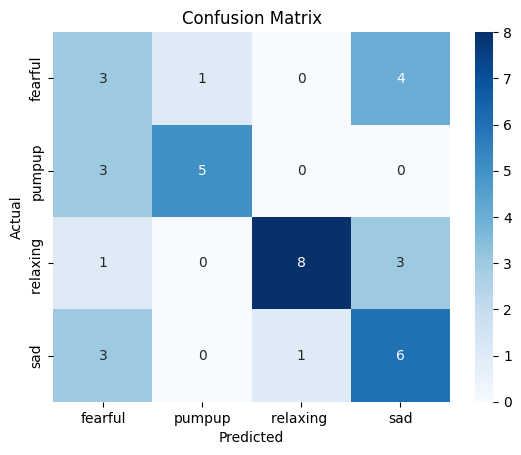

In [21]:
emotion_labels = label_encoder.classes_
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',xticklabels=emotion_labels, yticklabels=emotion_labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [22]:
plt.savefig("confusion_matrix.png")

<Figure size 640x480 with 0 Axes>